# Salary vs Experience - Linear Regression Model

In this notebook, we will start implementation of pytorch

**NOTE:** We are not going to datasplit or perform anyother operation. It is purely an implementation code.

## Import packages


In [1]:
import torch
import torch.nn as nn
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset

In [3]:
url = "https://raw.githubusercontent.com/git-to-aswin/ML-Model-Building/refs/heads/main/dataset/Salary_Data.csv"
df = pd.read_csv(url)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [11]:
X = df[['YearsExperience']].values
y = df[['Salary']].values

In [12]:
# Covnvert to Torch tensor
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

In [13]:
# Normalize X and y
X_mean = X.mean()
X_std = X.std()
y_mean = y.mean()
y_std = y.std()

Xn = (X - X_mean) / X_std
yn = (y - y_mean) / y_std

## Linear Regression Model

In [14]:
model = nn.Linear(in_features=1, out_features=1, bias=True)

 ## Define Loss Function + Optimizer

In [15]:
criterion = nn.MSELoss()
# Gradient Optimiser
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

In [16]:
epochs = 1000
losses = []

for epoch in range(epochs):
    y_pred = model(Xn)
    loss = criterion(y_pred, yn)

    # compute gradients
    loss.backward()

    # update weights
    optimizer.step()

    # reset gradients to zero
    optimizer.zero_grad()

    losses.append(loss.item())

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 2.9306
Epoch 100, Loss: 0.0416
Epoch 200, Loss: 0.0416
Epoch 300, Loss: 0.0416
Epoch 400, Loss: 0.0416
Epoch 500, Loss: 0.0416
Epoch 600, Loss: 0.0416
Epoch 700, Loss: 0.0416
Epoch 800, Loss: 0.0416
Epoch 900, Loss: 0.0416


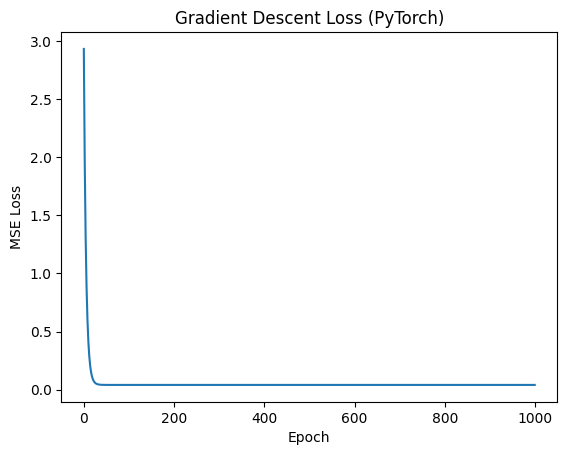

In [17]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Gradient Descent Loss (PyTorch)")
plt.show()

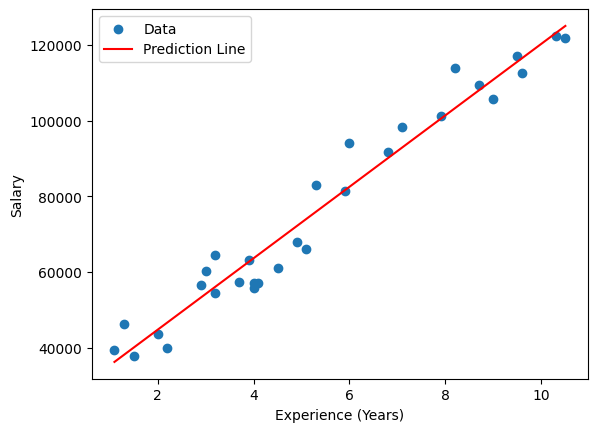

In [18]:
with torch.no_grad():
    predicted_norm = model(Xn).numpy()

# De-normalize predictions
predicted = predicted_norm * y_std.numpy() + y_mean.numpy()

plt.scatter(df['YearsExperience'], df['Salary'], label="Data")
plt.plot(df['YearsExperience'], predicted, color='red', label="Prediction Line")
plt.xlabel("Experience (Years)")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [19]:
def predict_salary(years):
    years = torch.tensor([[years]], dtype=torch.float32)
    years_norm = (years - X_mean) / X_std

    with torch.no_grad():
        pred_norm = model(years_norm)
        pred = pred_norm * y_std + y_mean
    return float(pred)

In [20]:
predict_salary(5)

73042.015625

In [21]:
predict_salary(15)

167541.59375

In [22]:
predict_salary(25)

262041.203125